In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import sklearn.decomposition as sd
from sklearn import metrics
import collections
import matplotlib.pyplot as plt

# Part 1 - LDA

In [2]:
instagram1 = pd.read_csv('../csm_2019_assignment_4/instagram_1.csv')

In [3]:
instagram1.head()

,hashtags
0,vibetribe openair spintwist fullon fiesta edm...
1,love beauty spring iphonesia igdaily igers in...
2,beautiful pencil sketch korea art seoul amate...
3,europe omd tagsforlikers olympus switzerland ...
4,eyes fashion victims blackandwhite ciao selfi...


In [4]:
instagram1.iloc[0]['hashtags']

' vibetribe openair spintwist fullon fiesta edm records psy vt party rave electronic psychedelic festa progressive dm7bookings festival trance davincicode mainstage progressivetrance music nightlife psytrance prog passion vibetribeofficial'

## Transform data into bag-of-words matrix

In [5]:
text_in_array = instagram1['hashtags'].tolist()

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer()
tf = tf_vectorizer.fit_transform(text_in_array)

In [7]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [8]:
def print_topics(model, feature_names, n_top_words, topics):
    for topic_idx, topic in enumerate(model.components_):
        print(topics[topic_idx] + ': ')
        message = ''
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print('')
    print()

## 15 differents topics

In [9]:
number_topics = 15
lda_15 = sd.LatentDirichletAllocation(n_components=number_topics, max_iter=10, random_state=0)
lda_15.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=15, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [10]:
tf_feature_names_15 = tf_vectorizer.get_feature_names()
print_top_words(lda_15, tf_feature_names_15, 10)

Topic #0: switzerland zürich zurich zrh art zh züri tsüri love swiss
Topic #1: switzerland love instagood dog animals pet pets nature dogsofinstagram animal
Topic #2: fitness fit gym healthy workout motivation zurich zürich love swiss
Topic #3: switzerland visitswitzerland ig_switzerland wu_switzerland myswitzerland ig_europe super_switzerland igerssuisse ig_swiss inlovewithswitzerland
Topic #4: switzerland swiss nature landscape mountain suisse alps sky mountains clouds
Topic #5: switzerland travel instatravel travelgram swiss trip suisse traveling schweiz photooftheday
Topic #6: switzerland snow mountains winter swiss nature schweiz alps sun landscape
Topic #7: switzerland party friends zurich music swiss happy love travel fun
Topic #8: igerssuisse switzerland picoftheday instagood gf_swiss instagramhub photooftheday all_shots igerszurich iphoneonly
Topic #9: instagood photooftheday picoftheday love instamood instadaily bestoftheday igers followme follow
Topic #10: switzerland travel

## 20 different topics

In [11]:
number_topics = 20
lda_20 = sd.LatentDirichletAllocation(n_components=number_topics, max_iter=10, random_state=0)
lda_20.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=20, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [12]:
tf_feature_names_20 = tf_vectorizer.get_feature_names()
print_top_words(lda_20, tf_feature_names_20, 10)

Topic #0: switzerland zürich art zurich artist gallery fashion swiss model makeup
Topic #1: switzerland cat love nature car animals the zurich speed home
Topic #2: fitness fit gym workout healthy motivation lifestyle instagood zürich love
Topic #3: switzerland vsco swiss vscocam geneva livefolk love art huntgram schweiz
Topic #4: switzerland swiss nature picture landscape beautifulday followme naturelover river instaphoto
Topic #5: travel switzerland mytravelgram instatravel travelgram vacation travelling holiday instatraveling photooftheday
Topic #6: switzerland swiss snow love schweiz winter zurich white uae sun
Topic #7: switzerland instagood ch swiss zurich happy love photooftheday weather world
Topic #8: igerssuisse switzerland instagood igerszurich instagramhub gf_swiss picoftheday photooftheday instamood iphoneonly
Topic #9: instagood picoftheday photooftheday instadaily love instamood bestoftheday followme igers follow
Topic #10: switzerland sport climb divinafotografia outdoor

## 25 different topics

In [13]:
number_topics = 25
lda_25 = sd.LatentDirichletAllocation(n_components=number_topics, max_iter=10, random_state=0)
lda_25.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=25, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [14]:
tf_feature_names_25 = tf_vectorizer.get_feature_names()
print_top_words(lda_25, tf_feature_names_25, 10)

Topic #0: zürich zurich switzerland züri fashion zh zrh tsüri zuerich swiss
Topic #1: switzerland eyes cat animals pets love cats animal with pet
Topic #2: zurich zürich instagood love schweiz swiss igerslausanne ootd switzerland instafashion
Topic #3: switzerland geneva art igerssuisse bestnatureshot طبيعه qatar love weekend sunday
Topic #4: switzerland swiss nature river landscape pictureoftheday mountain beautifull beautifulview beautifulday
Topic #5: travel instatravel switzerland travelgram trip traveling mytravelgram vacation photooftheday travelling
Topic #6: switzerland swiss schweiz snow love zurich suisse sun white black
Topic #7: switzerland party zurich friends love gay swiss night instagay summer
Topic #8: instagood igerssuisse instamood picoftheday photooftheday instagramhub switzerland iphoneonly iphonesia igers
Topic #9: instagood photooftheday picoftheday love instadaily followme follow bestoftheday instamood igers
Topic #10: fitness gym fit switzerland workout motivat

## Topics that are the most meaningful

I decided to keep the 15 different topics, because this is when they are the less mixed, otherwise they are always a lot of topics that contain 2-3 words that don't seem to belong to the topic and there are also topics that could be merged together.

In [15]:
topics = ['Zürich', 'Animals', 'Sport', 'Visit Switzerland', 'Landscape', 'Travel', 'Winter nature', 'Party', 'Photos of Instagram', 'Picture of the day', 'Nature', 'Sky', 'Climbing', 'Food', 'Instagrammers of Switzerland']

In [16]:
print_topics(lda_15, tf_feature_names_15, 10, topics)

Zürich: 
switzerland zürich zurich zrh art zh züri tsüri love swiss

Animals: 
switzerland love instagood dog animals pet pets nature dogsofinstagram animal

Sport: 
fitness fit gym healthy workout motivation zurich zürich love swiss

Visit Switzerland: 
switzerland visitswitzerland ig_switzerland wu_switzerland myswitzerland ig_europe super_switzerland igerssuisse ig_swiss inlovewithswitzerland

Landscape: 
switzerland swiss nature landscape mountain suisse alps sky mountains clouds

Travel: 
switzerland travel instatravel travelgram swiss trip suisse traveling schweiz photooftheday

Winter nature: 
switzerland snow mountains winter swiss nature schweiz alps sun landscape

Party: 
switzerland party friends zurich music swiss happy love travel fun

Photos of Instagram: 
igerssuisse switzerland picoftheday instagood gf_swiss instagramhub photooftheday all_shots igerszurich iphoneonly

Picture of the day: 
instagood photooftheday picoftheday love instamood instadaily bestoftheday igers f

## Discussion

I think the topics found with LDA have multiple problems. First, in almost all my topics I have the hashtag _switzerland_ that appears and I do not think that it is normal, because I do not think that all topics are related to Switzerland and that this hashtag is present in every list of hashtags from data. Nevertheless I have no idea where this can come from.

Otherwise I think that the topics are quite meaningful even if I got some topics that are almost the same as 'Nature' and _Landscape_ or _Photos of Instagram_ and _Instagrammers of Switzerland_ and _Picture of the day_. There is also the problem of having one of the words that is not related to the other ones like _architecture_ in the topic _Food_ or _سويسرا_ (Suisse in Arabic) in the topic _Sky_. Nevertheless, I did not think that the topics found were surprising, because there are pretty common on instagram.

If the collection of posts would have fewer hashtags, the topics would be less precise as the "documents" (list of hashtags) would be smaller and then it would be more difficult to infer topics from them.


# Part 2 - Random Forest

In [17]:
instagram2 = pd.read_json('../csm_2019_assignment_4/instagram_2.json', lines=True)

In [18]:
instagram2.head()

,_id,imgfeatures,label,tags
0,{'$oid': '5cd2d3c2c03b40d4f2d216dd'},"{'pedestal, plinth, footstall': 5e-05, 'entert...",alcohol,"{'raclette': 0, 'blackandwhite': 0, 'starbucks..."
1,{'$oid': '5cd2d3c2c03b40d4f2d216de'},"{'pedestal, plinth, footstall': 2e-05, 'entert...",alcohol,"{'raclette': 0, 'blackandwhite': 0, 'starbucks..."
2,{'$oid': '5cd2d3c2c03b40d4f2d216df'},"{'pedestal, plinth, footstall': 0.0, 'peacock'...",nonalcohol,"{'raclette': 0, 'blackandwhite': 0, 'starbucks..."
3,{'$oid': '5cd2d3c2c03b40d4f2d216e0'},"{'pedestal, plinth, footstall': 0.000130000000...",alcohol,"{'raclette': 0, 'blackandwhite': 0, 'starbucks..."
4,{'$oid': '5cd2d3c2c03b40d4f2d216e1'},"{'pedestal, plinth, footstall': 7.000000000000...",alcohol,"{'raclette': 0, 'blackandwhite': 0, 'starbucks..."


## Most common hashtags and visual objects

In [19]:
alcohol = instagram2.loc[instagram2['label'] == 'alcohol']
non_alcohol = instagram2.loc[instagram2['label'] == 'nonalcohol']

In [20]:
alcohol.head()

,_id,imgfeatures,label,tags
0,{'$oid': '5cd2d3c2c03b40d4f2d216dd'},"{'pedestal, plinth, footstall': 5e-05, 'entert...",alcohol,"{'raclette': 0, 'blackandwhite': 0, 'starbucks..."
1,{'$oid': '5cd2d3c2c03b40d4f2d216de'},"{'pedestal, plinth, footstall': 2e-05, 'entert...",alcohol,"{'raclette': 0, 'blackandwhite': 0, 'starbucks..."
3,{'$oid': '5cd2d3c2c03b40d4f2d216e0'},"{'pedestal, plinth, footstall': 0.000130000000...",alcohol,"{'raclette': 0, 'blackandwhite': 0, 'starbucks..."
4,{'$oid': '5cd2d3c2c03b40d4f2d216e1'},"{'pedestal, plinth, footstall': 7.000000000000...",alcohol,"{'raclette': 0, 'blackandwhite': 0, 'starbucks..."
5,{'$oid': '5cd2d3c2c03b40d4f2d216e2'},"{'pedestal, plinth, footstall': 5e-05, 'entert...",alcohol,"{'raclette': 0, 'blackandwhite': 0, 'starbucks..."


### Most common 30 hashtags

In [21]:
def merge_dic(dictionaries): #to make one dictonary with all the lines of data as they all have the same keys
    counter = collections.Counter() 
    for dic in dictionaries:  
        counter.update(dic) 
      
    result = dict(counter.most_common(30)) 
    return result

In [22]:
alcohol_tags = merge_dic(alcohol['tags'])

In [23]:
non_alcohol_tags = merge_dic(non_alcohol['tags'])

In [24]:
def plot_histogram(title, xlabel, ylabel, data):
    plt.xticks(rotation = 90)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.bar(list(data.keys()), data.values())
    plt.show()

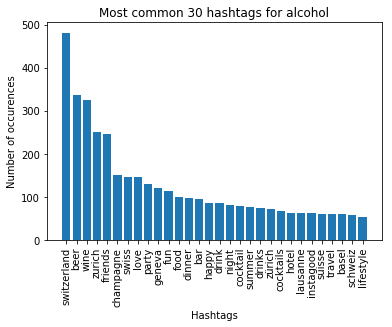

In [25]:
plot_histogram('Most common 30 hashtags for alcohol', 'Hashtags', 'Number of occurences', alcohol_tags)

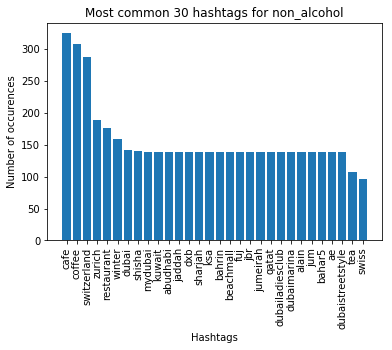

In [26]:
plot_histogram('Most common 30 hashtags for non_alcohol', 'Hashtags', 'Number of occurences', non_alcohol_tags)

### Most common 30 visual objects

In [27]:
alcohol_visual = merge_dic(alcohol['imgfeatures'])

In [28]:
non_alcohol_visual = merge_dic(non_alcohol['imgfeatures'])

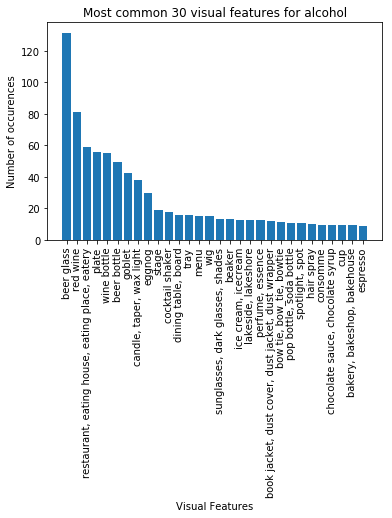

In [29]:
plot_histogram('Most common 30 visual features for alcohol', 'Visual Features', 'Number of occurences', alcohol_visual)

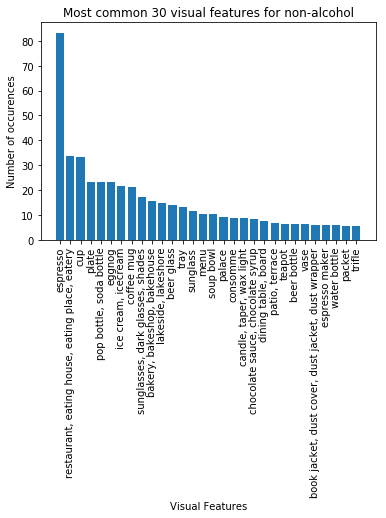

In [30]:
plot_histogram('Most common 30 visual features for non-alcohol', 'Visual Features', 'Number of occurences', non_alcohol_visual)

## Random Forest Classifier

In [31]:
insta2 = instagram2.copy()

In [32]:
insta2.head()

,_id,imgfeatures,label,tags
0,{'$oid': '5cd2d3c2c03b40d4f2d216dd'},"{'pedestal, plinth, footstall': 5e-05, 'entert...",alcohol,"{'raclette': 0, 'blackandwhite': 0, 'starbucks..."
1,{'$oid': '5cd2d3c2c03b40d4f2d216de'},"{'pedestal, plinth, footstall': 2e-05, 'entert...",alcohol,"{'raclette': 0, 'blackandwhite': 0, 'starbucks..."
2,{'$oid': '5cd2d3c2c03b40d4f2d216df'},"{'pedestal, plinth, footstall': 0.0, 'peacock'...",nonalcohol,"{'raclette': 0, 'blackandwhite': 0, 'starbucks..."
3,{'$oid': '5cd2d3c2c03b40d4f2d216e0'},"{'pedestal, plinth, footstall': 0.000130000000...",alcohol,"{'raclette': 0, 'blackandwhite': 0, 'starbucks..."
4,{'$oid': '5cd2d3c2c03b40d4f2d216e1'},"{'pedestal, plinth, footstall': 7.000000000000...",alcohol,"{'raclette': 0, 'blackandwhite': 0, 'starbucks..."


In [33]:
insta2 = insta2.replace(['nonalcohol', 'alcohol'], [0, 1]) #in order to make prediction

In [34]:
textual = []
for features in insta2['tags']:
    textual.append(list(features.values()))

In [35]:
columns_name_textual = list(insta2['tags'][0].keys())

In [36]:
textual_df = pd.DataFrame(textual, columns=columns_name_textual) #make new dataframe with only the text features

In [37]:
visual = []
for features in insta2['imgfeatures']:
    visual.append(list(features.values()))

In [38]:
columns_name_visual = list(insta2['imgfeatures'][0].keys())

In [39]:
visual_df = pd.DataFrame(visual, columns=columns_name_visual) #make new dataframe with only the visual features

### With text features

In [40]:
X = textual_df
y = insta2['label']  #Labels

In [41]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

In [42]:
accuracy = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
recall = cross_val_score(clf, X, y, cv=10, scoring='recall')

In [43]:
print("Accuracy:", sum(accuracy)/len(accuracy))
print("Recall:", sum(recall)/len(recall))

Accuracy: 0.6766685740952677
Recall: 1.0


### With visual features

In [44]:
X = visual_df
y = insta2['label']  #Labels

In [45]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

In [46]:
accuracy = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
recall = cross_val_score(clf, X, y, cv=10, scoring='recall')

In [47]:
print("Accuracy:", sum(accuracy)/len(accuracy))
print("Recall:", sum(recall)/len(recall))

Accuracy: 0.8460071223013589
Recall: 0.9983957219251336


## Discussion

The experimental setup for the Machine Learning part is a Random Forest Classifier with 100 estimators, a max-depth of 2 and a 10-fold cross validation.

For the histograms of text features, we can see that if we exclude the _#switzerland_ (not relevant as this is one of the criterion to be part of the data), _beer_ and _wine_ are the hasthags the most used for alcoholic drinks when it is cafe and coffee that are the most used for non-alcoholic drinks (more used than _switzerland_, which is not the case for _beer_ and _wine_). What is surprising is that a lot of hashtags used for non-alcoholic drinks are related to Dubai and the Middle East (_dubai_, _mydubai_, _dubailadiesclub_, _dubaimarina_, _dubaistreetstyle_, _kuwait_, _abudhabi_, _bahrin_, ...), so we can wonder why these hashtags are used with _#switzerland_. Even if there are a lot of tourists from those countries that come in Switzerland, I do not see why they would use these hashtags if they drink a coffee in Switzerland (especially _#dubaimarina_ or _#mydubai_ because it cannot be used to show its affiliations to a country).
For the alcoholic drinks, the most used hashatgs are less surprising as they are related to swiss cities (_zurich_, _geneva_, _lausanne_, _basel_), or to drinks and party (_champagne_, _dinner_, _bar_, _drinks_, _cocktails_, _happy_, ...).

For the histograms of visual features, we can see that for each of the two categories, one visual feature is really dominating the plot. For the non-alcoholic drinks, it is an _expresso_, which is relevant with the text features as the most used hashtags are _cafe_ and _coffee_. For the alcoholic drinks, it is a _beer glass_, which is also relevant with the text features as the second most used hashtag is _beer_. Otherwise, the other visual features found are not really surprising and coherent with the objects/places you would expect to go with alcoholic and non-alcoholic drinks with the exception of _wig_ and _hair spray_ for the non-alcoholic drinks and _trifle_ and _dust cover_ for the alcoholic ones.

For the Machine Learning part, the classification is harder with the text feature as it only has an accuracy of 0.677 when it has an accuracy of 0.846 with the visual features.
I was suprised that the accuracy obtained with text features is not higher than 0.67 as there are only two labels possible and than the most used hashtags at least do not intersect. It is probably due to the maximum depth allowed in the settings of the Random Forest Classifier, because if we try with a higher value (like 10), we reach an accuracy of 0.8, which is closer to the accuracy obtained with the visual features and a depth of 2. In fact, by looking at the histograms, I would have guess that the contrary would have happened as there are more intersection between the two classes for the visual features than for the text ones. As I mentionned before, one way of improving the model would be to increase the maximal depth of the random forest, because 2 is a really small depth and it does not really take advantage of the power of this classifier (with 2 it is closer to a simple decision tree rather than a real random forest).